In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster

C:\Users\dhfps\anaconda3\envs\geo\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [6]:
## pension_df 파일 불러오기
pension_df = pd.read_csv("pension_df.csv", encoding='utf-8')

## pension_2021 파일 불러오기
pension_2021 = pd.read_csv("pension_2021.csv", encoding='utf-8')

## pension_div 파일 불러오기
pension_div = pd.read_csv("pension_div.csv", encoding='utf-8')

## pension_month 파일 불러오기
pension_month = pd.read_csv("pension_month.csv", encoding='utf-8')

## pension_season 파일 불러오기
pension_season = pd.read_csv("pension_season.csv", encoding='utf-8')

## pension_type 파일 불러오기
pension_type = pd.read_csv("pension_type.csv", encoding='utf-8')

## p_group 파일 불러오기
p_group = pd.read_csv("p_group.csv", encoding='utf-8')

In [3]:
## 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# Seaborn 

### ↓↓ 발표용은 '★' 표시 ↓↓

* color palette
https://seaborn.pydata.org/tutorial/color_palettes.html
* color palette 사용법
https://hleecaster.com/python-seaborn-color/

### 기사1 : https://kto.visitkorea.or.kr/kor/biz/invest/news/board/view.kto?id=441703&rnum=118
### 기사2 : https://biz.chosun.com/site/data/html_dir/2020/05/10/2020051000236.html
### 기사3 : https://moneys.mt.co.kr/news/mwView.php?no=2020070813348022694
### 기사4 : https://www.edaily.co.kr/news/read?newsId=03496486629045640&mediaCodeNo=257
### 기사5 : https://www.mk.co.kr/news/culture/view/2021/12/1144803/

## 색깔 지정시 아래 규칙 참고

1) x축 = month(월별) -> Paired

2) x축 = geo(시도별) -> mako

3) x축 = season(계절별) -> coolwarm_r

4) x축 = type(타입별) -> twilight

## Countplot

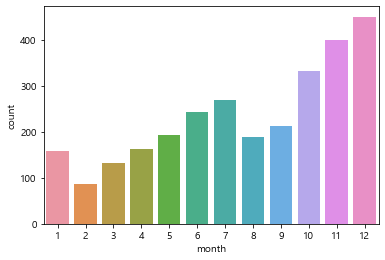

In [7]:
sns.countplot(x="month", data=pension_df);

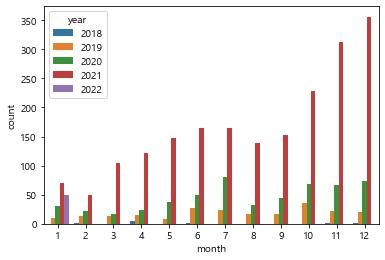

In [8]:
sns.countplot(x="month", hue="year", data=pension_df);

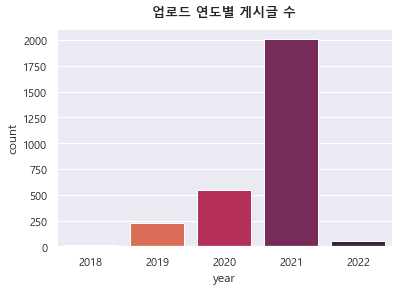

In [230]:
## 연도, 월별 게시글 수  #★

fig,ax = plt.subplots(figsize=(6,4))

sns.set(font_scale = 0.7)
sns.set_palette("rocket_r",n_colors=5, color_codes=True)
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.countplot(x="year", data=pension_df,ax=ax);
plt.title("업로드 연도별 게시글 수", fontsize=13,
          fontweight='bold', y=1.03);

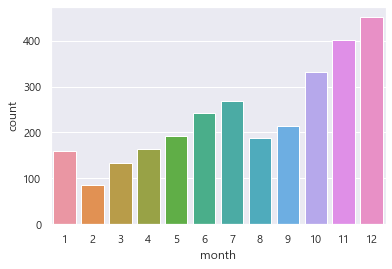

In [46]:
## 월별 게시글 수
sns.countplot(x="month", data=pension_df);

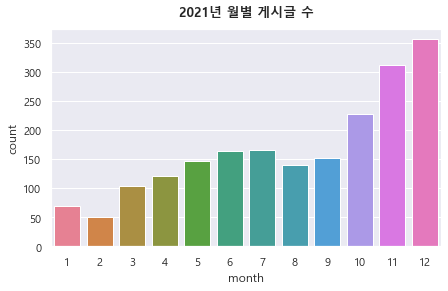

In [232]:
## 월별 게시글 수(2021년만) #★

fig,ax = plt.subplots(figsize=(7,4))

sns.set(font_scale = 1.0)
sns.set_palette("husl",n_colors=12, color_codes=True)
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.countplot(x="month", data=pension_2021,ax=ax);
plt.title("2021년 월별 게시글 수", fontsize=13,
          fontweight='bold', y=1.03);

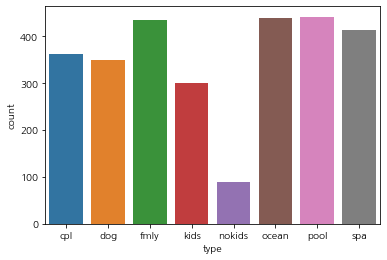

In [121]:
## 펜션 타입 별 게시글 수
sns.countplot(x="type", data=pension_df);

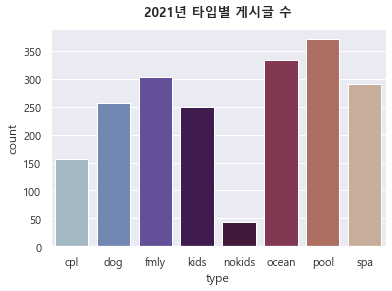

In [117]:
## 펜션 타입별 게시글 수(2021년만)   #★

fig,ax = plt.subplots(figsize=(6,4))

sns.set(font_scale = 1.0)
sns.set_palette("twilight",n_colors=8, color_codes=True)
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.countplot(x="type", data=pension_2021,ax=ax);
plt.title("2021년 타입별 게시글 수", fontsize=13,
          fontweight='bold', y=1.03);

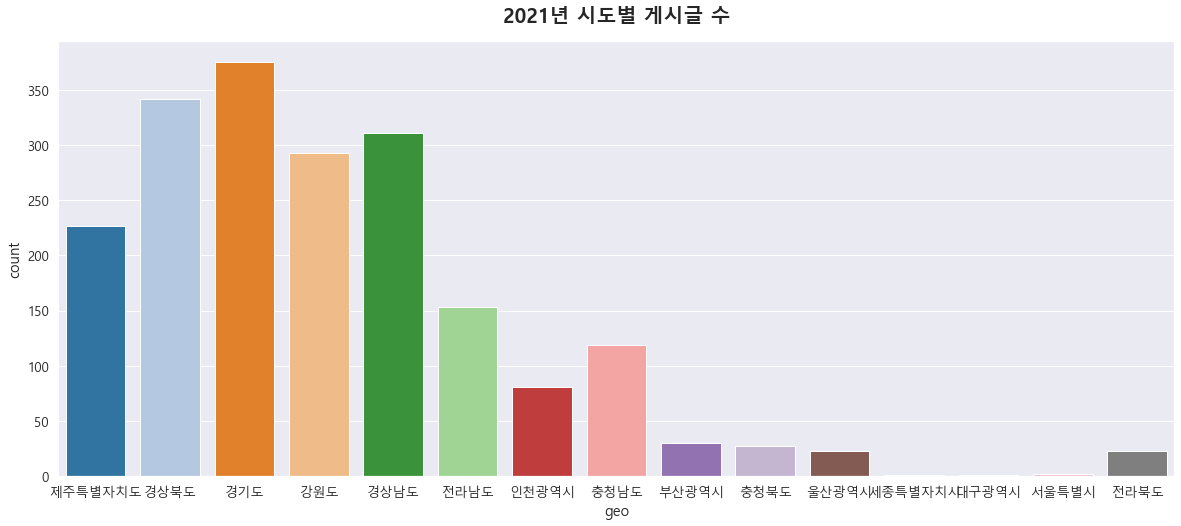

In [243]:
## 시도별 게시글 수(2021년만)   #★

fig,ax = plt.subplots(figsize=(20,8))

sns.set(font_scale = 1.2)
sns.set_palette("tab20",n_colors=15, color_codes=True)

sns.countplot(x="geo", data=pension_2021,ax=ax);

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("2021년 시도별 게시글 수", fontsize=20,
          fontweight='bold', y=1.03);

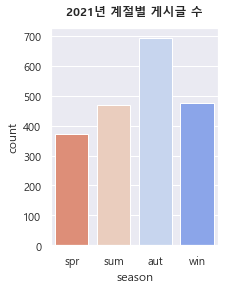

In [248]:
## 계절별 게시글 수(2021년만)   #★

fig,ax = plt.subplots(figsize=(3,4))

sns.set(font_scale = 1.0)
sns.set_palette("coolwarm_r",n_colors=4, color_codes=True)
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.countplot(x="season", data=pension_2021,ax=ax,
              order=['spr','sum','aut','win']);

plt.title("2021년 계절별 게시글 수", fontsize=12,
          fontweight='bold', y=1.03);

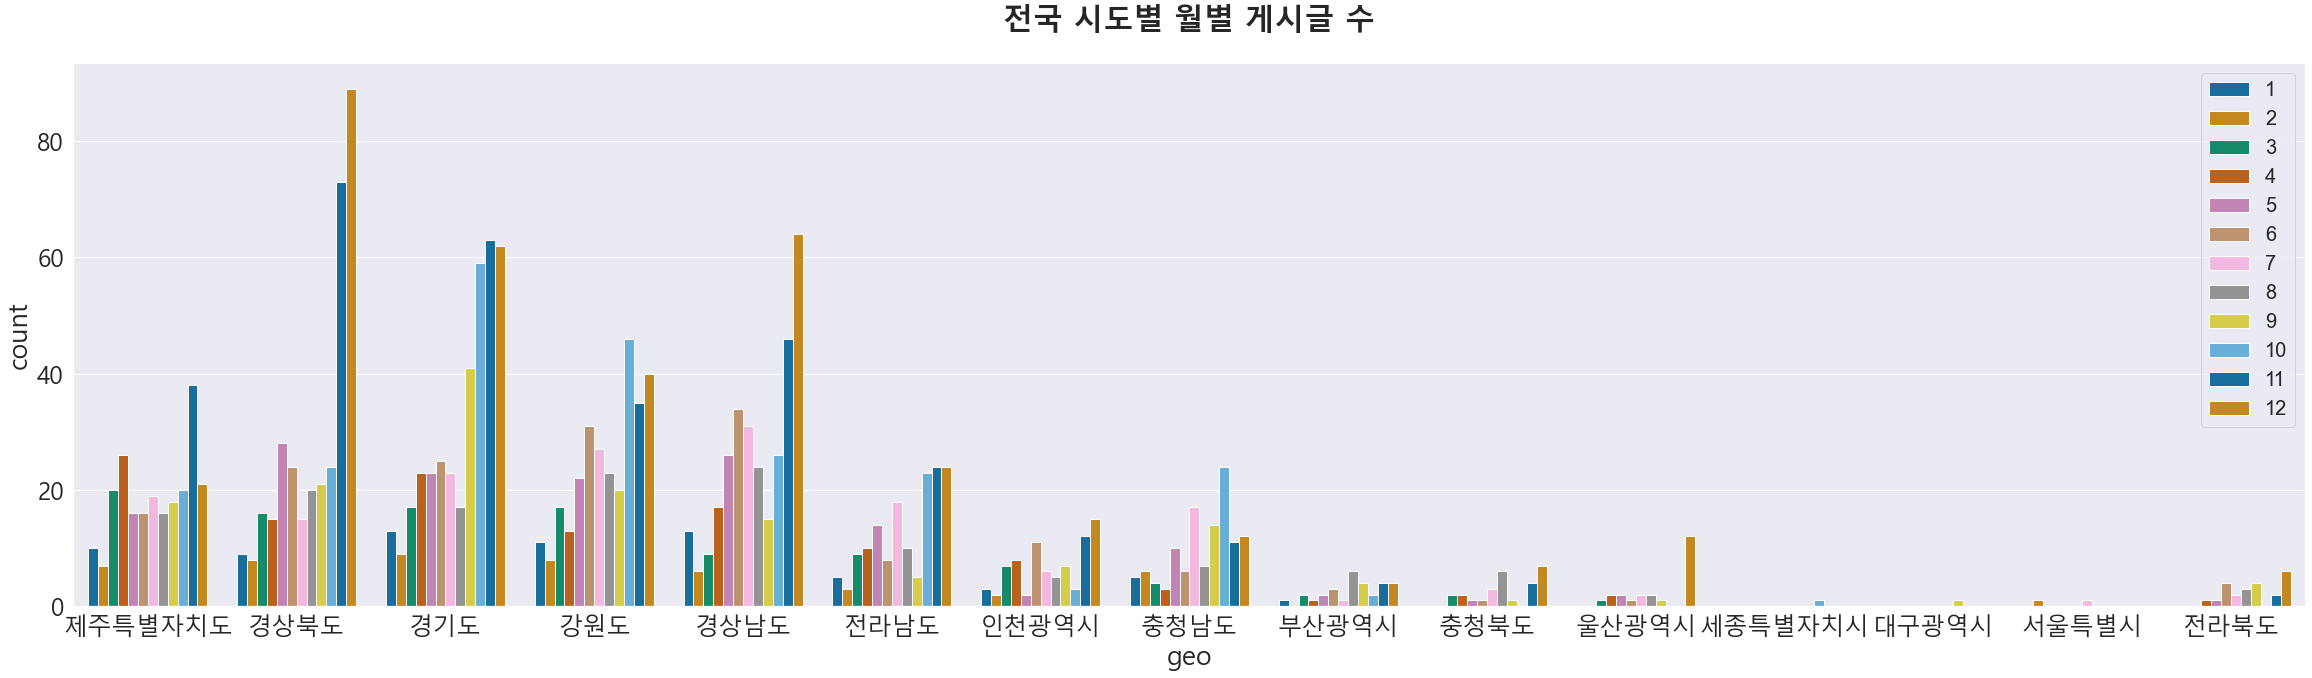

In [144]:
## 시도별 게시글 수(월로 색깔 구분)   (#★)

fig,ax = plt.subplots(figsize=(40,10))

sns.set(font_scale = 2.2)
sns.set_palette("colorblind",n_colors=12, color_codes=True)   #Accent_r

sns.countplot(x='geo', hue='month', data=pension_2021);

plt.legend(loc='upper right', fontsize=20)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("전국 시도별 월별 게시글 수", fontweight='bold', fontsize=30,
          loc='center', y=1.05);

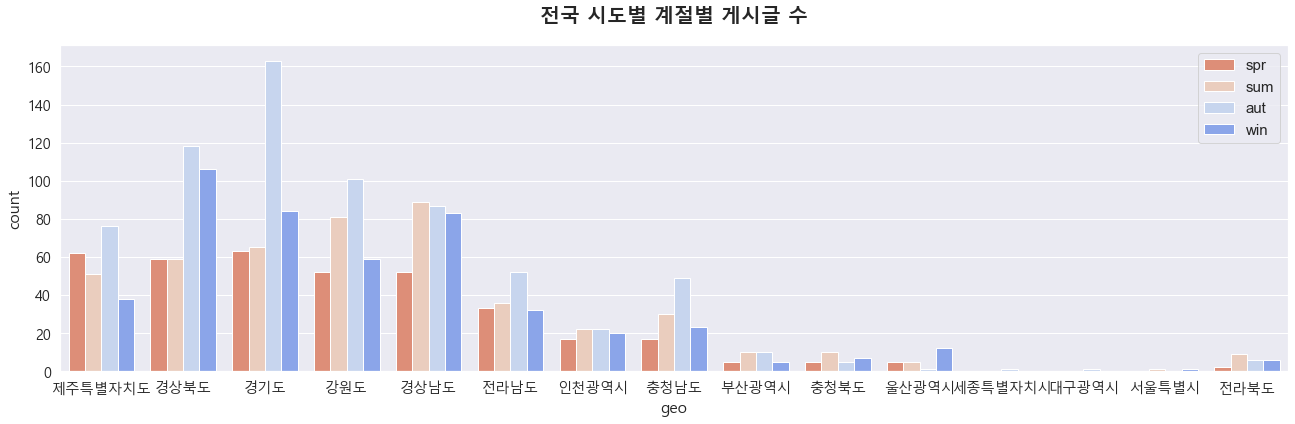

In [146]:
## 시도별 게시글 수(계절로 색깔 구분)  ##★

fig,ax = plt.subplots(ncols=1,figsize=(22,6))

sns.set(font_scale = 1.0)
sns.set_palette("coolwarm_r",n_colors=4, color_codes=True)

sns.countplot(x='geo', hue='season', data=pension_2021,
              hue_order=['spr','sum','aut','win'], ax=ax);

plt.title("전국 시도별 계절별 게시글 수", fontweight='bold',
          fontsize=20, y=1.05)
plt.legend(loc='upper right', fontsize=15)
plt.rcParams['font.family'] = 'Malgun Gothic'

## 도희 Barplot 추가

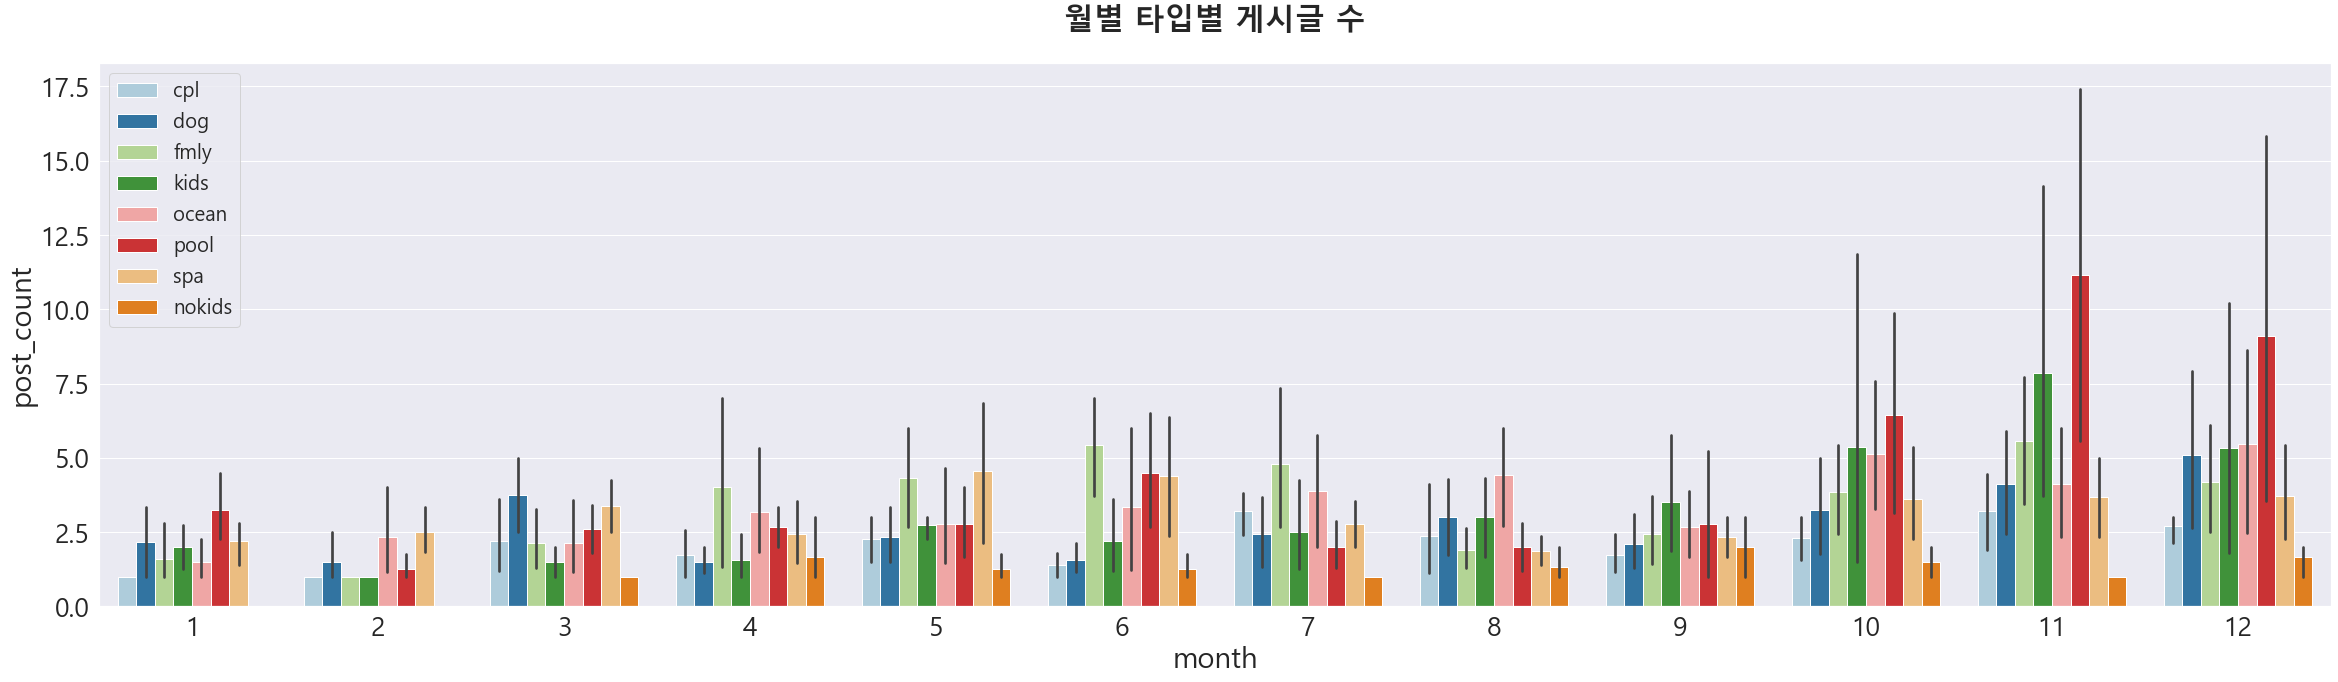

In [167]:
## 월별 게시글 수(타입으로 색깔 구분)   (#★)

fig,ax = plt.subplots(figsize=(40,10))

sns.set(font_scale = 2.4)
sns.set_palette("Paired",n_colors=8, color_codes=True)

sns.barplot(x='month', y='post_count', hue='type',
            data=p_group, ax=ax);

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.legend(loc='upper left', fontsize=20)
plt.title("월별 타입별 게시글 수", fontweight='bold', fontsize=30,
          loc='center', y=1.05);

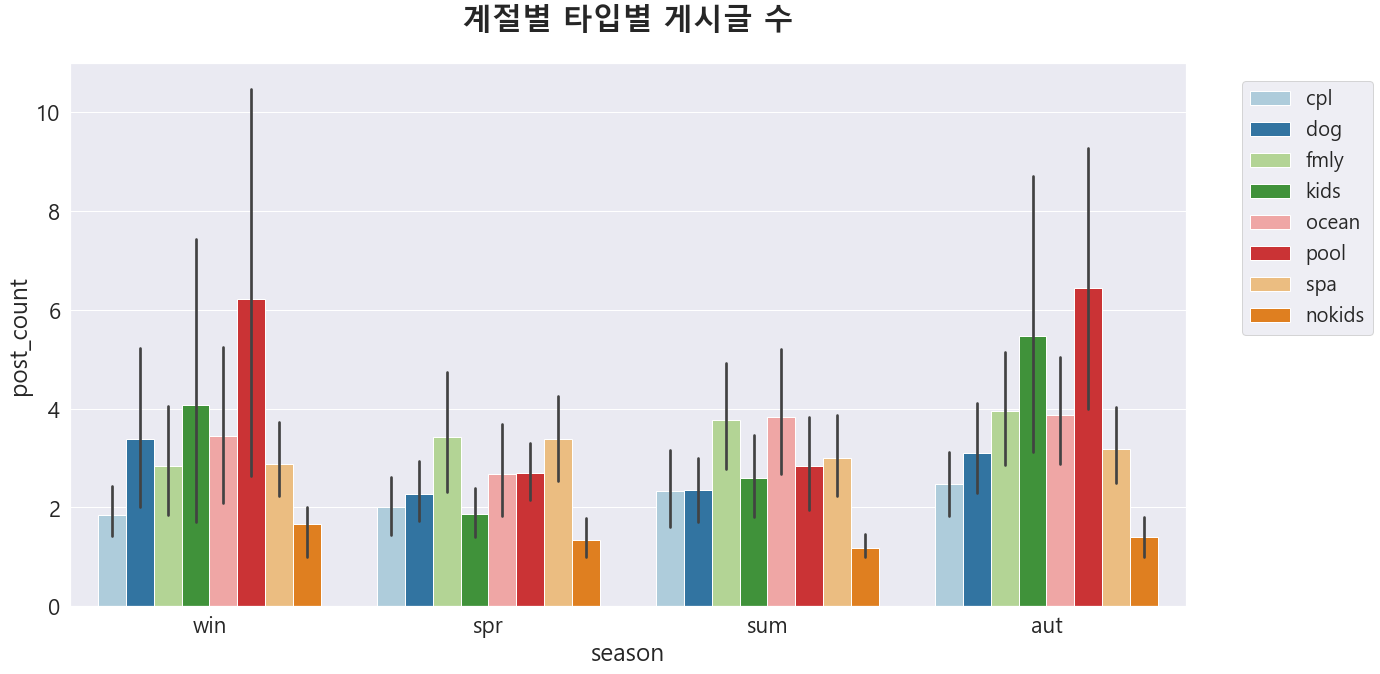

In [161]:
## 계절별 게시글 수(타입으로 색깔 구분)   ##★

fig,ax = plt.subplots(figsize=(20,10))

sns.set(font_scale = 2.0)
sns.set_palette("Paired",n_colors=8, color_codes=True)

sns.barplot(x='season', y='post_count', hue='type',
            data=p_group, ax=ax);

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.legend(loc=(1.05,0.5), fontsize=20)
plt.title("계절별 타입별 게시글 수", fontweight='bold', fontsize=30,
          loc='center', y=1.05);

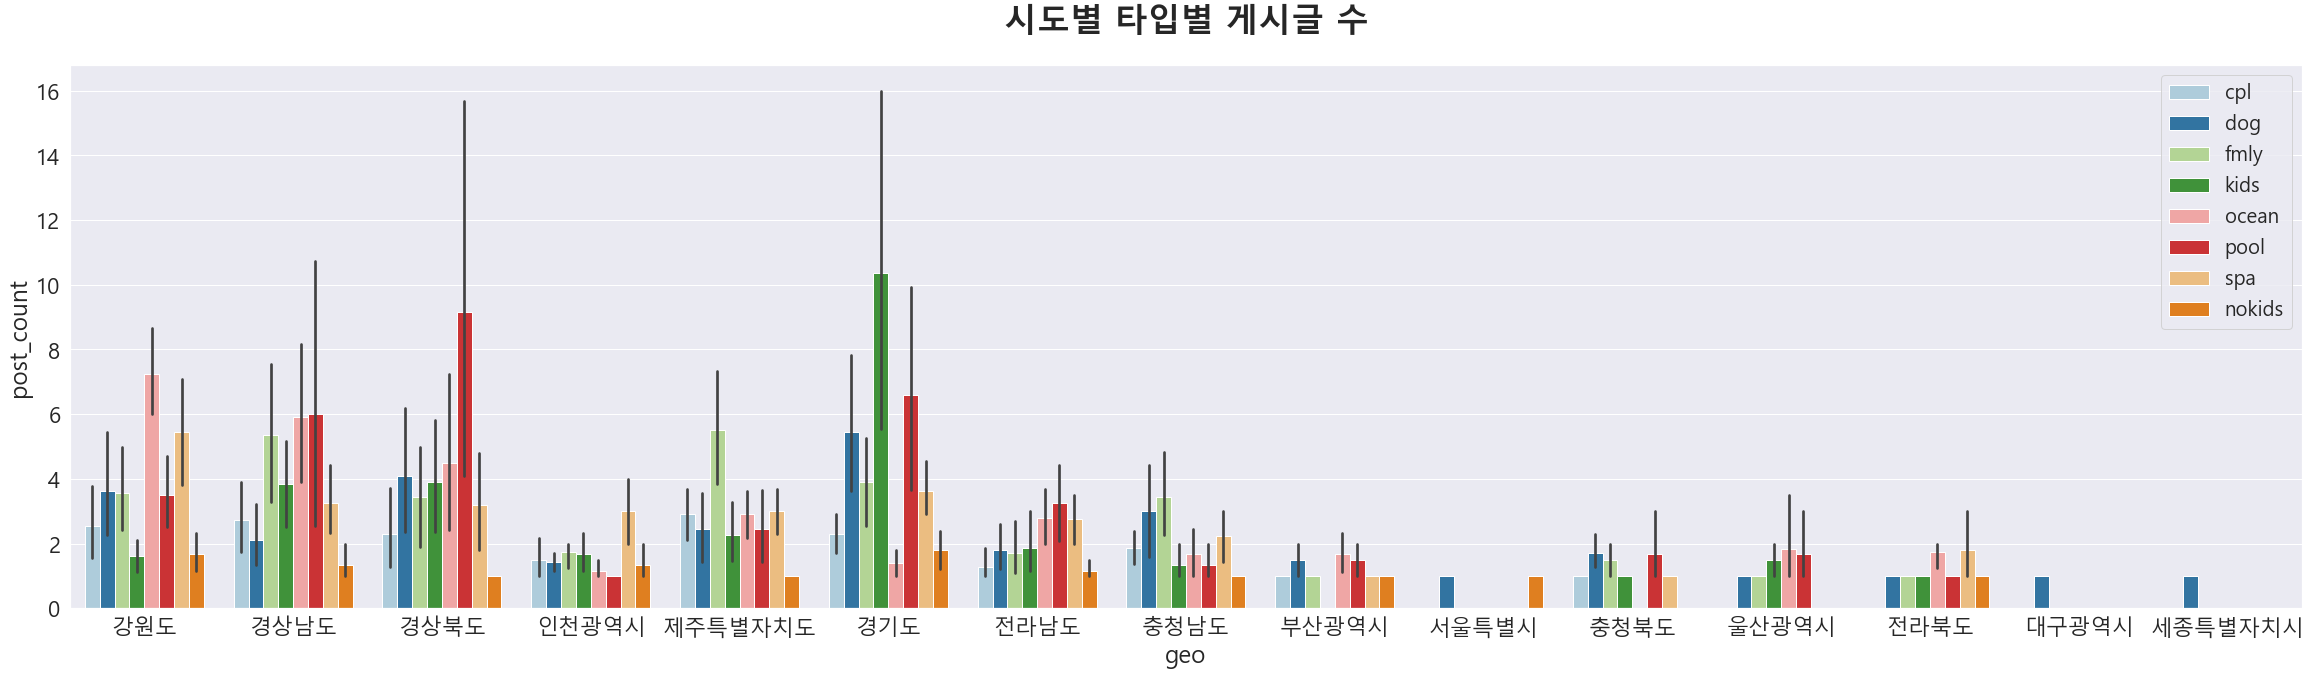

In [250]:
## 시도별 게시글 수(타입으로 색깔 구분)   ##★

fig,ax = plt.subplots(figsize=(40,10))

sns.set(font_scale = 2.2)
sns.set_palette("Paired",n_colors=8, color_codes=True)

sns.barplot(x='geo', y='post_count', hue='type',
            data=p_group, ax=ax);

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.legend(loc="upper right", fontsize=20)
plt.title("시도별 타입별 게시글 수", fontweight='bold', fontsize=33,
          loc='center', y=1.05);

## ★ 이부분 히트맵이랑 비교해서 발표 ★

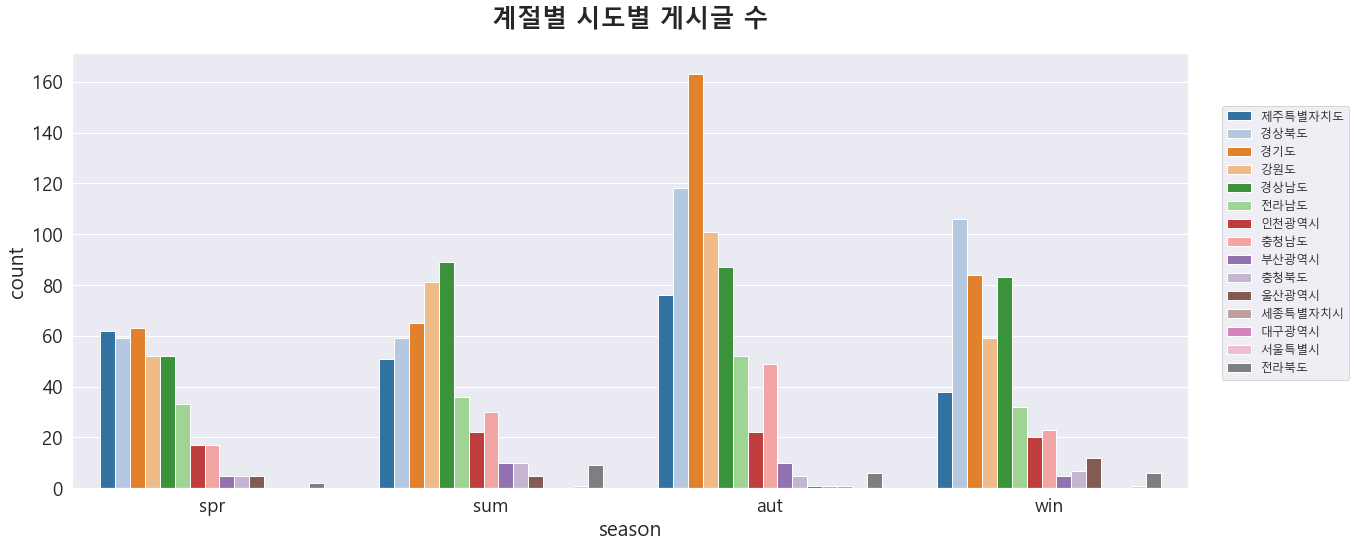

In [194]:
## 계절별 게시글 수(시도별 색깔 구분)   #★

fig,ax = plt.subplots(ncols=1,figsize=(20,8))

sns.set(font_scale = 1.7)
sns.set_palette("tab20",n_colors=15, color_codes=True)

sns.countplot(x='season', hue='geo', #kind='bar', height=6, aspect=2,
            data=pension_2021, order=['spr','sum','aut','win'], ax=ax);

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.legend(fontsize=12, loc=(1.03,0.25))
plt.title("계절별 시도별 게시글 수", fontweight='bold', fontsize=25,
          loc='center', y=1.05);

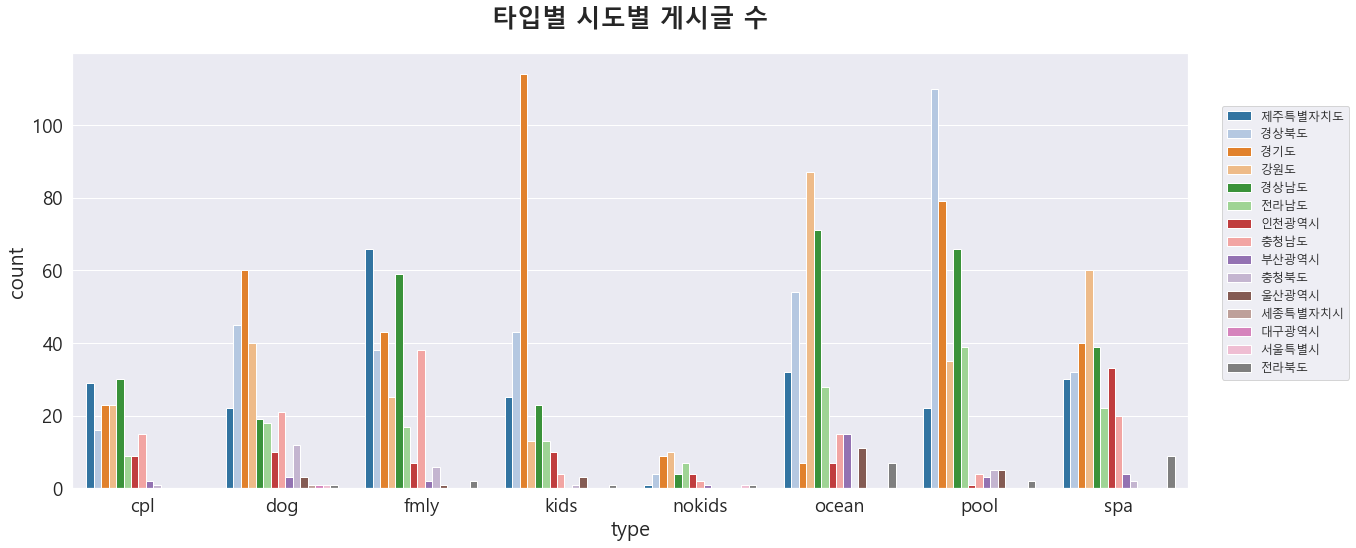

In [196]:
## 펜션 타입별 게시글 수(시도별 색깔 구분)   #★

fig,ax = plt.subplots(ncols=1,figsize=(20,8))

sns.set(font_scale = 1.7)
sns.set_palette("tab20",n_colors=15, color_codes=True)

sns.countplot(x='type', hue='geo', #kind='bar', height=6, aspect=2,
            data=pension_2021, ax=ax);

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.legend(fontsize=12, loc=(1.03,0.25))
plt.title("타입별 시도별 게시글 수", fontweight='bold', fontsize=25,
          loc='center', y=1.05);

## ★★★★★★★★★★

# pie chart - 게시글 수 ★

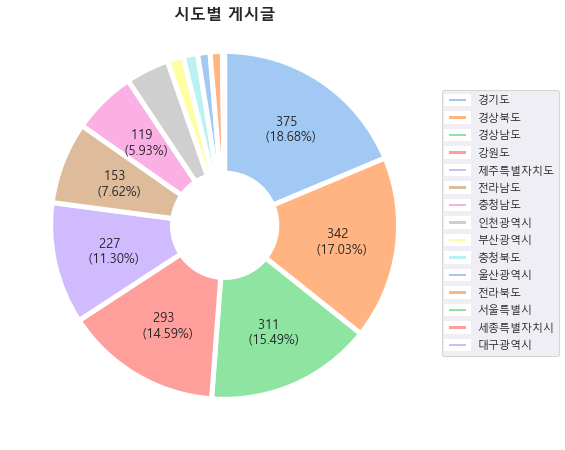

In [207]:
## 데이터 준비   #★
labels = pension_div['ctp_name'] ## 라벨
frequency = pension_div['post_count'] ## 빈도
colors = sns.color_palette('pastel')[0:len(labels)] ## 색상

## 파이차트 그리기
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}) # 스타일 변경

total = np.sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        text = f'{frequency[i]} \n ({frequency[i]/total*100:.2f}%)' 
    else: ## 마지막 파이 조각은 안그리기
        text = ""
        
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 > threshold:
        x = (r/1.5)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/1.5)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=13)

## 제목, 범례 추가
plt.title("시도별 게시글", fontsize=16, fontweight='bold',y=0.96)
plt.legend(pie[0],labels,loc=(1.0,0.2), fontsize=11) ## 범례

plt.show()

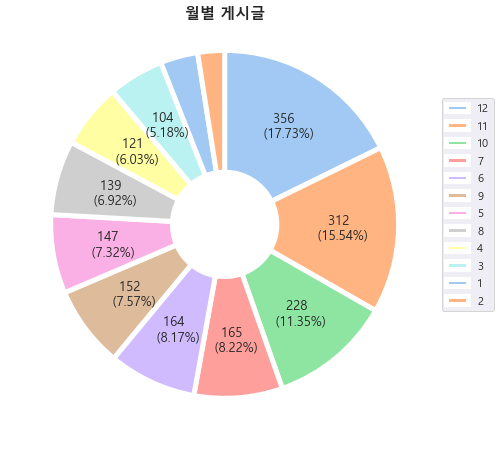

In [221]:
# 데이터 준비   #★
labels = pension_month['month'] ## 라벨
frequency = pension_month['post_count'] ## 빈도
colors = sns.color_palette('pastel')[0:len(labels)] ## 색상


## 파이차트 그리기
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}) # 스타일 변경

total = np.sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일


## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        text = f'{frequency[i]} \n ({frequency[i]/total*100:.2f}%)' 

    else: ## 마지막 파이 조각은 안그리기
        text = ""
        
        ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 > threshold:
        x = (r/1.5)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/1.5)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=13)

## 제목, 범례 추가
plt.title("월별 게시글", fontsize=15, fontweight='bold',y=0.96)
plt.legend(pie[0],labels,loc=(1.0,0.3), fontsize=11) ## 범례

plt.show()

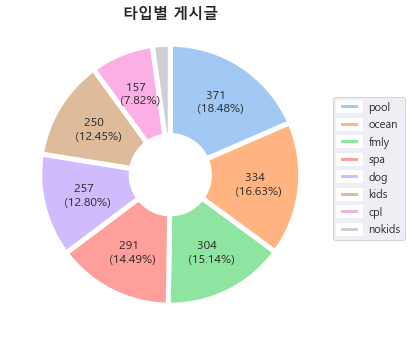

In [224]:
# 데이터 준비   #★
labels = pension_type['type'] ## 라벨
frequency = pension_type['post_count'] ## 빈도
colors = sns.color_palette('pastel')[0:len(labels)] ## 색상


## 파이차트 그리기
fig = plt.figure(figsize=(6,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}) # 스타일 변경

total = np.sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일


## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        text = f'{frequency[i]} \n ({frequency[i]/total*100:.2f}%)' 

    else: ## 마지막 파이 조각은 안그리기
        text = ""
        
        ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 > threshold:
        x = (r/1.5)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/1.5)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)

## 제목, 범례 추가
plt.title("타입별 게시글", fontsize=15, fontweight='bold',y=0.96)
plt.legend(pie[0],labels,loc=(1.0,0.3), fontsize=11) ## 범례

plt.show()

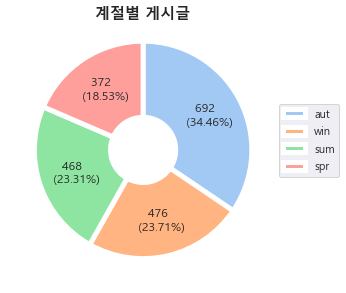

In [228]:
# 데이터 준비   #★
labels = pension_season['season'] ## 라벨
frequency = pension_season['post_count'] ## 빈도
colors = sns.color_palette('pastel')[0:len(labels)] ## 색상


## 파이차트 그리기
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}) # 스타일 변경)

total = np.sum(frequency) ## 빈도수 합
# threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일


## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이

    text = f'{frequency[i]} \n ({frequency[i]/total*100:.2f}%)' 
    x = (r/1.5)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
    y = (r/1.5)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    ax.text(x,y,text,ha='center',va='center',fontsize=12)

## 제목, 범례 추가
plt.title("계절별 게시글", fontsize=15, fontweight='bold',y=0.96)
plt.legend(pie[0],labels,loc=(1.0,0.4), fontsize=11) ## 범례

plt.show()

# catplot - 팬수

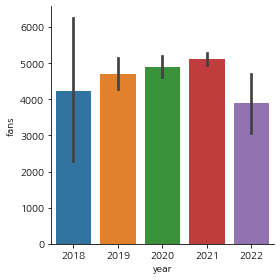

In [128]:
## 년도, 월별 팬 수

sns.catplot(x='year', y='fans',  kind='bar', data=pension_df, height=4);

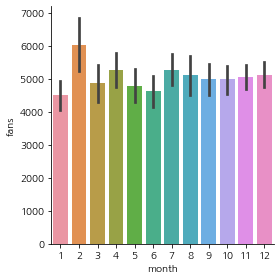

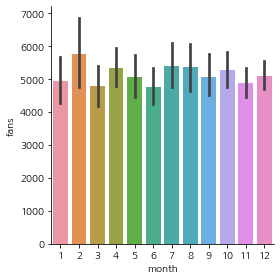

In [129]:
sns.catplot(x='month', y='fans',  kind='bar', data=pension_df, height=4);
sns.catplot(x='month', y='fans',  kind='bar', data=pension_2021, height=4);   #2021

# box plot

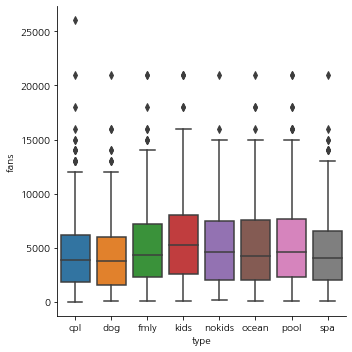

In [39]:
## 펜션 타입별 블로거 팬 수

sns.catplot(x="type", y='fans', kind='box', data=pension_df);

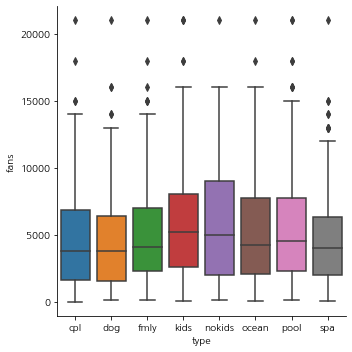

In [130]:
sns.catplot(x="type", y='fans', kind='box', data=pension_2021);    #2021년만

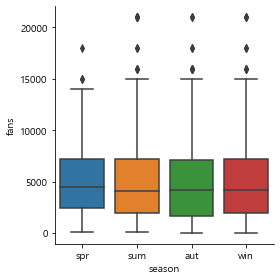

In [43]:
## 계절별 블로거 팬 수

sns.catplot(x="season", y='fans', kind='box', data=pension_2021, height=4, order=['spr','sum','aut','win']);

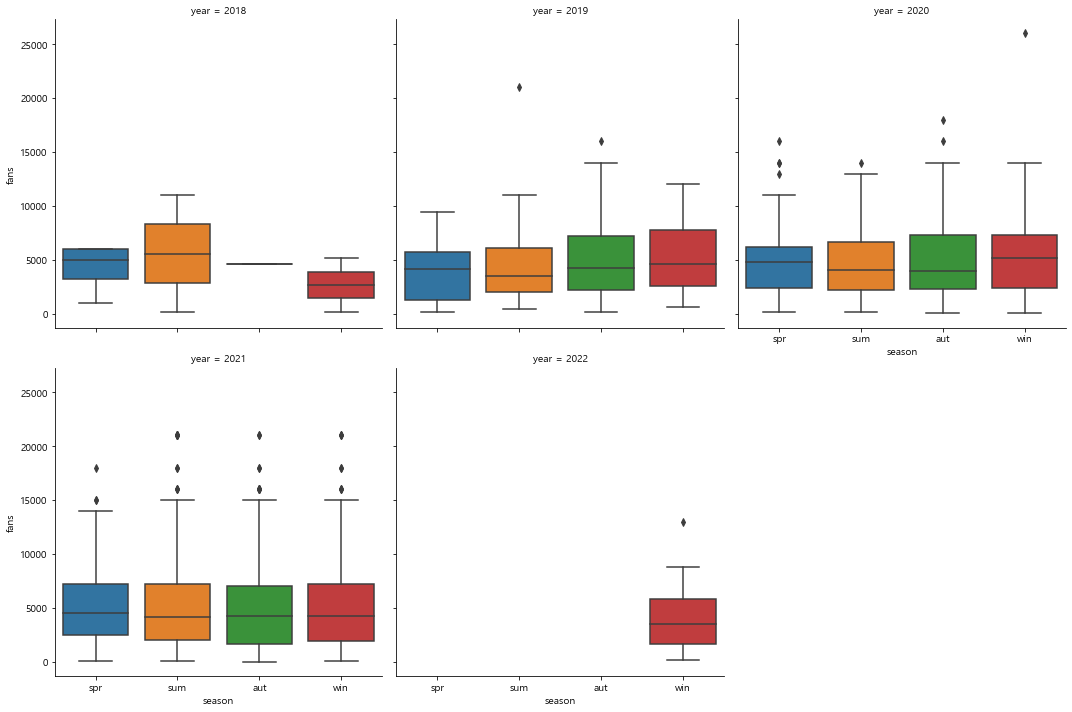

In [42]:
## 계절별 블로거 팬 수(그래프 년도로 구분)

sns.catplot(x="season", y='fans', kind='box', col='year', data=pension_df, col_wrap=3, order=['spr','sum','aut','win']);

# line plot

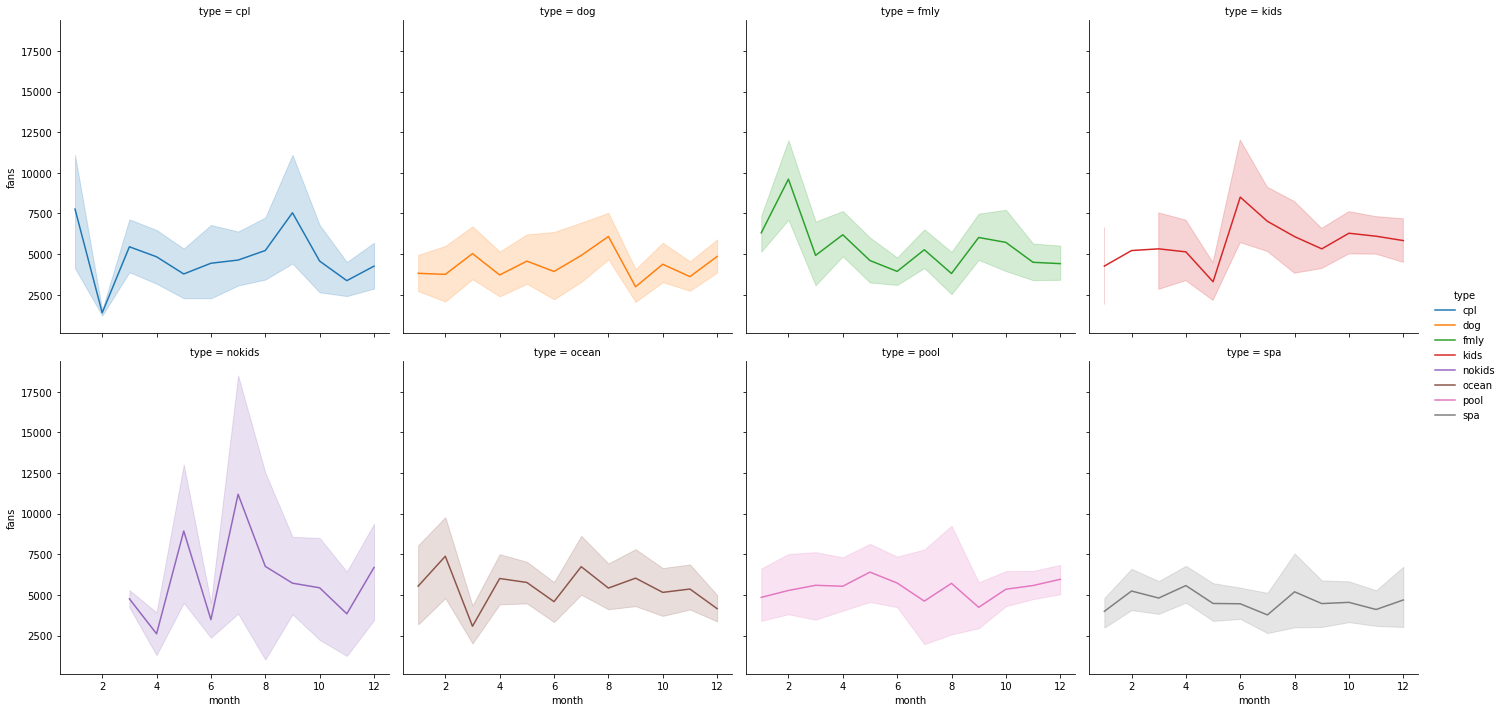

In [10]:
## x=month, y=fans수, year별 라인 그래프(타입별 그래프 구분)

sns.relplot(x='month', y='fans', kind='line', col='type', hue='type',  #height=4, aspect=.7,
            col_wrap=4, data=pension_2021);

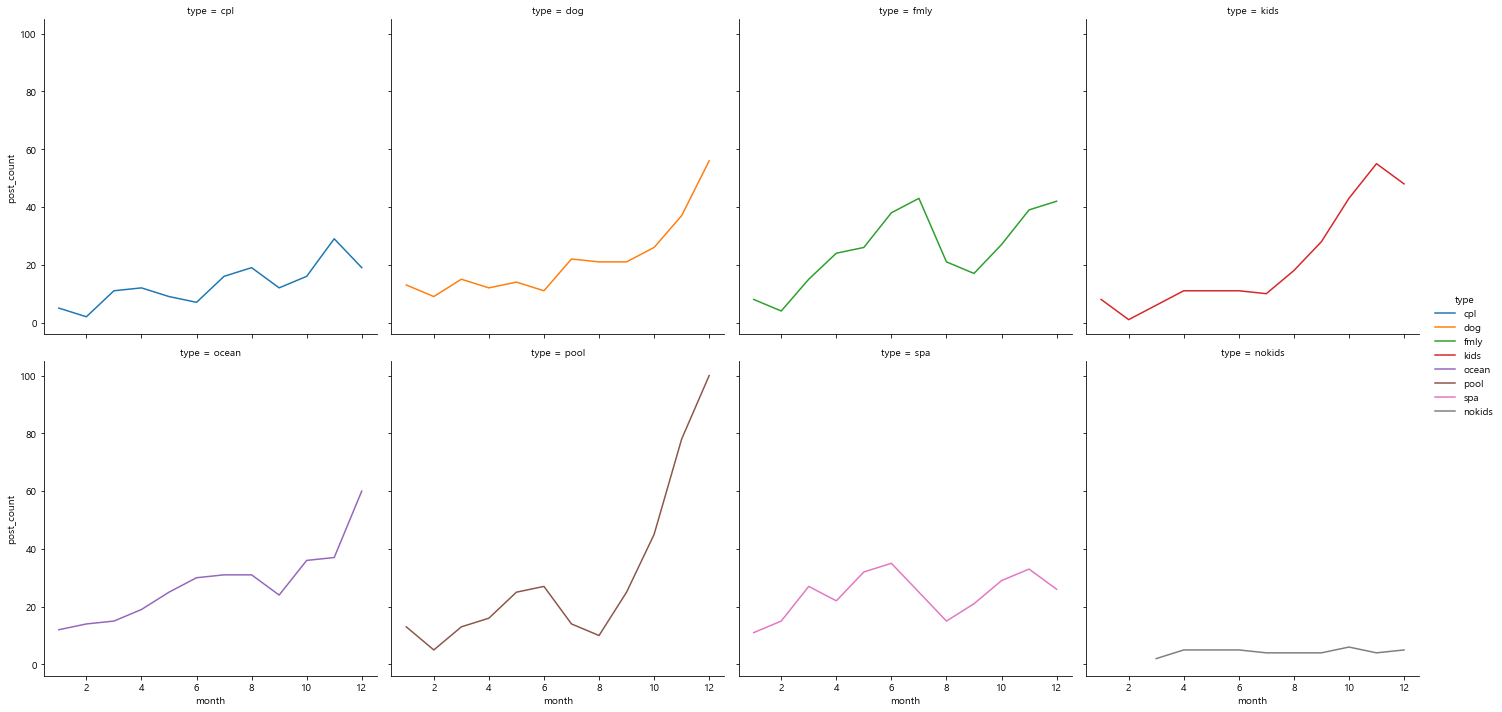

In [28]:
## x=month, y=post_count, year별 라인 그래프(타입별 그래프 구분)

sns.relplot(x='month', y='post_count', kind='line', col='type', hue='type',
            col_wrap=4, data=p_month_type);

# swamplot

In [ ]:
sns.catplot(x="month", y="type", kind="swarm", data=pension_2021);

In [ ]:
sns.catplot(x="season", y='fans', kind="swarm", data=pension_2021);

In [ ]:
sns.catplot(x='month', y='fans', kind='swarm', col='type', hue='type',
            col_wrap=4, data=pension_2021);

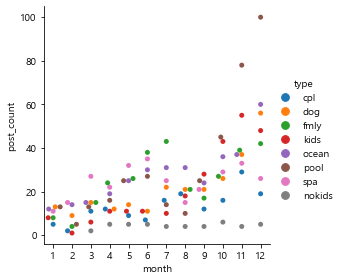

In [35]:
sns.catplot(x='month', y='post_count', kind='swarm', hue='type',
             data=p_month_type, height=4);

# relplot

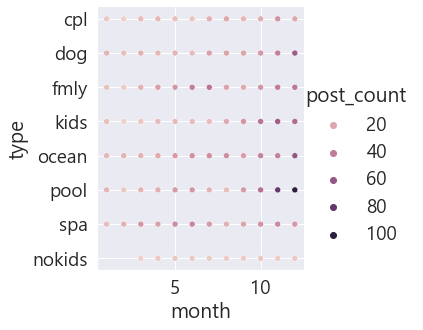

In [155]:
sns.relplot(data=p_month_type, x="month", y="type", hue="post_count")

In [ ]:
sns.relplot(data=pension_2021, x="month", y="type", hue="day")

sns.relplot(
    data=pension_2021, x="month", y="type", col="season",
    hue="day", style="type", kind="line",
)

In [ ]:
sns.relplot(x='month', y='fans', data=pension_df);
sns.relplot(x='month', y='fans', data=pension_2021);   #2021

## 민재님 캐치하신 부분

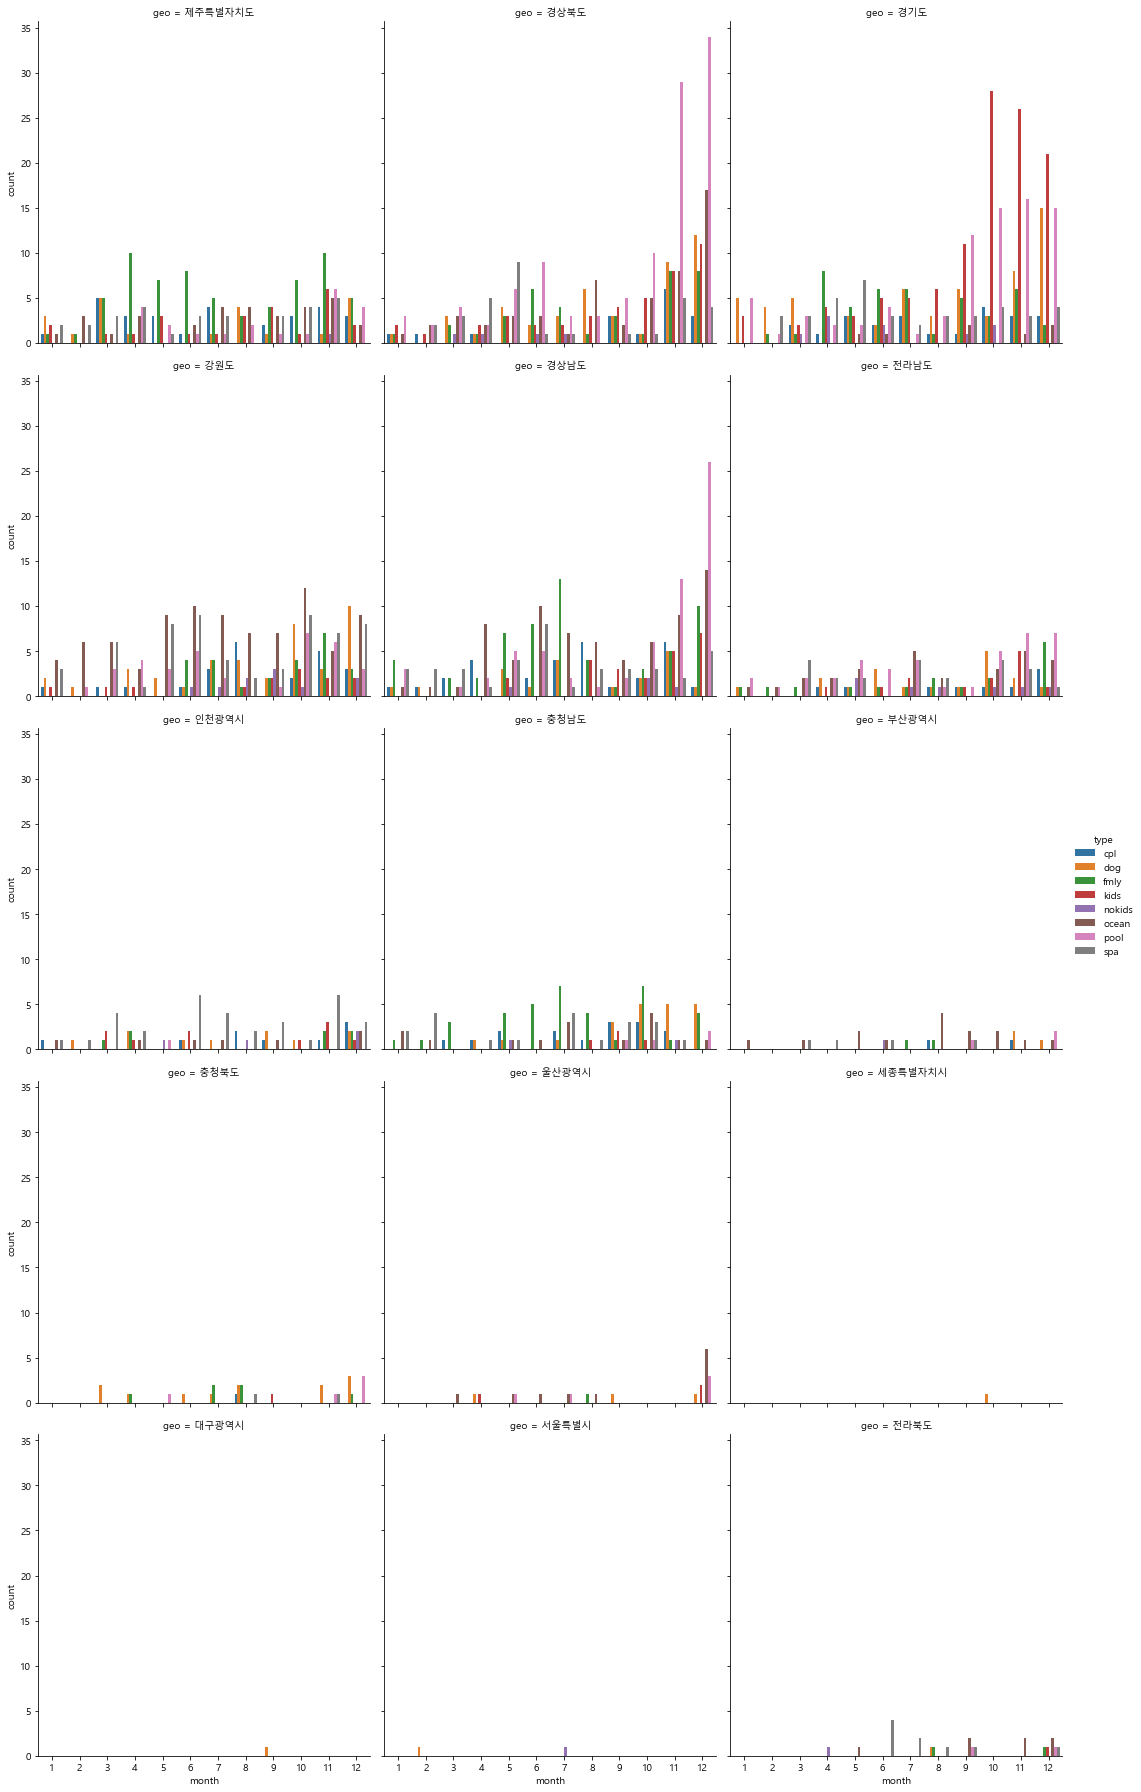

In [18]:
plt.rc("font", family = "Malgun Gothic")
sns.catplot(x="month", hue="type", col="geo", col_wrap=3,
                data=pension_2021, kind="count");

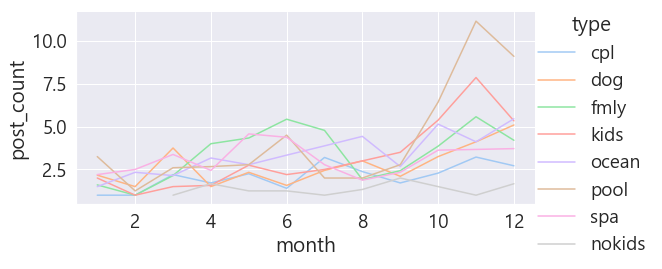

In [156]:
## 월별 펜션 타입별 게시글 추세선 그래프 (##★)
sns.relplot(x='month', y='post_count', hue='type', kind='line', ci=None, aspect=2, data=p_group, height=4);